# HW Training models

## Nick Pranske, 113500528

#### Use what you learned in Chapter 4 (polynomial features, polynomial regression, Ridge Regression, Lasso Regression) to analyze the dataset from population_vs_day_ch4.csv

In this file, the population (in millions) of one species and the date are recorded.

date: the date

day: the index of the day, we assume 20190101 is the first day and 20190102 is the second day.

population: the population (in millions) of one species



Build data mining models based on the **THREE regression methods, polynomial regression, Ridge Regression, and Lasso Regression**. Visualize the results. Write a short analysis of the results and describe what you find.

Submit your python code and analysis in one ipynb file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. (1 point) Load the csv file using pandas

In [2]:
df=pd.read_csv("population_vs_day_ch4.csv")
df

,date,day,population
0,20190101,1,4938.225264
1,20190102,2,-610.316132
2,20190103,3,-401.079322
3,20190104,4,2673.800717
4,20190105,5,964.405784
...,...,...,...
985,20210912,986,-4079.134724
986,20210913,987,8267.915735
987,20210914,988,187.224141
988,20210915,989,4668.333013


### 2. (2 points) Use the "day" feature to create polynonial features, degree=10,include_bias=False
Store and show the generated new features to X_poly

In [33]:
X=df[["day"]]
y=df[["population"]]

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
poly = PolynomialFeatures(degree=10,include_bias=False)

### 3. (2 points) Use the X_poly and LinearRegression() to build a regression model

In [36]:
poly.fit(X)

PolynomialFeatures(degree=10, include_bias=False)

In [37]:
X_poly=poly.transform(X)

In [38]:
lm_poly=LinearRegression(n_jobs=-1)

In [39]:
lm_poly.fit(X_poly,y)

LinearRegression(n_jobs=-1)

In [44]:
X_new=np.linspace(0,1000,1000).reshape(-1,1)

In [45]:
X_new_poly=poly.transform(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [46]:
X_new_poly=poly.transform(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [47]:
lm.fit(X_poly,y)

LinearRegression(n_jobs=-1)

### 4. (2 points) Use the X_poly and Ridge() to build a regression model, $\alpha=1$

In [52]:
from sklearn.linear_model import Ridge

In [53]:
lm_ridge=Ridge(alpha=1)

In [54]:
lm_ridge.fit(X_poly,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.84427e-59): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

### 5. (2 points) Use the X_poly and Lasso() to build a regression model, $\alpha=1$

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lm_lasso=Lasso(alpha=1)

In [57]:
lm_lasso.fit(X_poly,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+11, tolerance: 2.768e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

### 6. (7 points) Draw the traing dataset and the threee prediction models in one figure.
We should generate a figure similar to this one.
<img width="800" src="https://juxinglong.github.io/static/img/ML/ch4_hw.png"/>

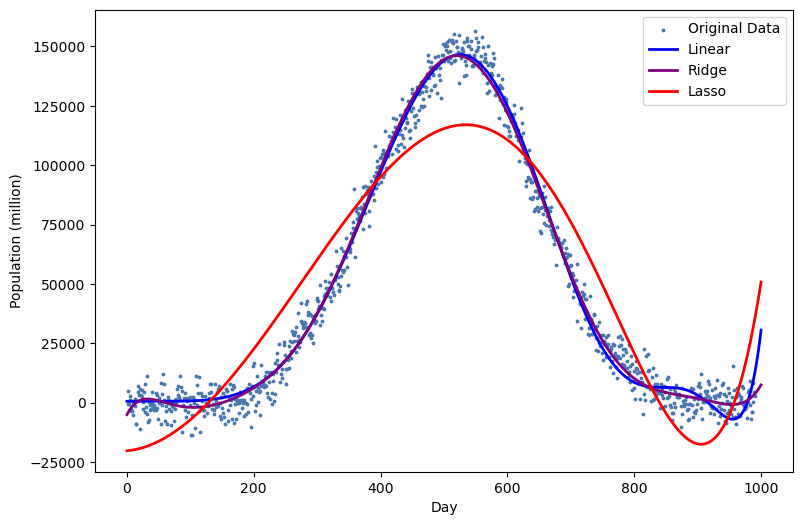

In [66]:
figure1 = plt.figure(figsize = (9,6))
ax1=plt.subplot(1,1,1)
plt.scatter(X,y,c="#4777af",s=3,label="Original Data")
plt.plot(X_new,lm.predict(X_new_poly),c="blue",lw=2,label="Linear")
plt.plot(X_new,lm_ridge.predict(X_new_poly),c="purple",lw=2,label="Ridge")
plt.plot(X_new,lm_lasso.predict(X_new_poly),c="red",lw=2,label="Lasso")

plt.xlabel("Day")
plt.ylabel("Population (million)")
plt.legend()
plt.show()

### 7. (4 points) Make comments on the generated figure and prediction models.

#### Your answer here

Based on the generated figure, it seems using the Ridge normalization is the most accurate to the data.